In [1]:
################################################################################################################################
############################## PRACTICA NLP: Jordi Ortega - IA2 ################################################################
################################################################################################################################

# 0. Ejercicio 1. Descarga y Exploración del corpus

# 1. Entorno y descarga -> Entorno del propio notebook en colab y descarga de un subset de reviews
# 2. Análisis Exploratorio:
#         2.1. Cardinalidad del vocabulario
#         2.2. Distribución de reviews por número de estrellas
#         2.3. Nº de reviews positivias y negativas
#         2.4. N-grams más frecuentes
#         2.5. Nubes de palabras
#         2.6. Visualización en 2 dimensiones de algunos word embeddings calculados con Word2Vec
# 3. Conclusiones

In [2]:
################################################################################################################################
############################## ENTORNO Y DESCARGA ##############################################################################
################################################################################################################################

In [3]:
# Al no trabajar desde Jupyter Notebook no necesitamos crear un venv. Colab proporciona un entorno aislado con cada cuaderno.
# Devuelve la ubicación /usr/bin/python3 del sistema operativo Linux (Ubuntu) sobre el que corre Colab.
import sys
print(sys.executable)

# Comprobamos que librerías vienen en el propio entorno
# !pip freeze

# Las librerías especificas que no vienen de origen las instalaremos directamente desde el cuaderno
# !pip install nombre_paquete

/usr/bin/python3


In [4]:
# Data Source: https://cseweb.ucsd.edu/~jmcauley/datasets.html#amazon_reviews
# 2023 version
# Bridging Language and Items for Retrieval and Recommendation
# Yupeng Hou, Jiacheng Li, Zhankui He, An Yan, Xiusi Chen, Julian McAuley

In [5]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [6]:
import datasets
datasets.logging.set_verbosity_error()

In [7]:
from datasets import load_dataset

# Seleccionamos el dataset llamado 'Sports and Outdoors' del que estudiaremos las reviews
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_Sports_and_Outdoors",streaming=True, trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/19.7k [00:00<?, ?B/s]

Amazon-Reviews-2023.py:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

In [8]:
import pandas as pd
# Accedemos a la división 'full'
data_iterable = dataset['full']

# Extraemos sólo los primeros 5000 registros limitando el aprendizaje del modelo pero priorizando componer un proceso/práctica coherente/completo.
subset = []
for i, record in enumerate(data_iterable):
    subset.append(record)
    if i == 4999:
        break

print(subset[:5])
df = pd.DataFrame(subset)
print(df.head())

# Guardamos los primeros 5000 registros en un archivo .csv
df.to_csv("sports_outdoors_5000.csv", index=False)

[{'rating': 5.0, 'title': 'Crazy comfy!', 'text': 'Not gonna lie- they are not much to look at. Lol. Luckily I’m one of those ppl that values things for function over looks & these function well so far. They are seriously one of the most comfortable pairs of socks I’ve owned in 5 decades.  I have not tried to wash them yet, so fingers crossed on that rn.  They feel very cushiony.  I wear them in my winter boots & just on my feet shoeless around my home.  I wish they came in more colors.  I’m one of those ppl that absolutely cannot stand toe seams on socks, but these have not bothered me at all.  I have super high arches so the only change I would make to the socks would be some compression there.  However, the socks fit perfectly as-is which really surprised me given my arches.  I just like having compression at my arches bc it feels good on them.  I wear a ladies 10-1/2 shoe- mens 8-1/2 and I bought the medium socks. They fit perfectly.  That’s never happened.  I had honestly expected

In [9]:
df.head(20)

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Crazy comfy!,Not gonna lie- they are not much to look at. L...,[],B07F3BDT8T,B0BGFR76CF,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1677321053520,8,True
1,5.0,Excellent!,I love it. Pretty!,[],B00NXQLFQQ,B00NXQLFQQ,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1523093771676,0,True
2,5.0,Best saddle pads,Huge fan of B Vertigo and this dressage pad do...,[],B08SVPR266,B0957WLR63,AGGZ357AO26RQZVRLGU4D4N52DZQ,1653526919105,0,True
3,5.0,Perfect repair kit,"I have a great Weaver halter. Recently, the Ch...",[],B00IET8S80,B00IET8S80,AGGZ357AO26RQZVRLGU4D4N52DZQ,1627330911189,0,True
4,5.0,Works great,This was great for a slightly too-short girth!...,[],B00DV0MKUY,B01C2SW7XA,AGGZ357AO26RQZVRLGU4D4N52DZQ,1617831811976,0,True
5,5.0,Great stirrups with bar none grip,"I have to say, the grip on these are pretty gr...",[{'small_image_url': 'https://images-na.ssl-im...,B002HPNBMU,B09NQK7MH9,AGGZ357AO26RQZVRLGU4D4N52DZQ,1612965746894,0,True
6,5.0,Perfect,Perfect for my boy! He looks adorable in it an...,[{'small_image_url': 'https://images-na.ssl-im...,B019U2RCAO,B01DFBQEKA,AGGZ357AO26RQZVRLGU4D4N52DZQ,1612126664309,0,True
7,5.0,Awesome leathers,These are amazing. My trainer noticed right aw...,[],B07NJ2SZQX,B07NJ2SZQX,AGGZ357AO26RQZVRLGU4D4N52DZQ,1573237536081,6,False
8,4.0,"Nice product, sizing off!","Product is well made, but sizing seems way off...",[],B00GAG0LDO,B00GAG0LDO,AGGZ357AO26RQZVRLGU4D4N52DZQ,1438304920000,1,True
9,4.0,Mixed feelings,"I loved this chalk bag online, but in person, ...",[],B001D08ZBW,B001D08ZBW,AGGZ357AO26RQZVRLGU4D4N52DZQ,1331692117000,0,True


In [10]:
# Seleccionamos sólo las 3 variables que nos interesan. En otras iteraciones se podrían estudiar si las imágenes aportan valor o el flag de 'verified_purchase' es significativo.

reviews_sport = df[['rating', 'title', 'text']]
reviews_sport = reviews_sport.rename(columns={
    'rating': 'sentiment',
    'title': 'title',
    'text': 'review'
})

reviews_sport = reviews_sport.dropna()

print(reviews_sport.head())

   sentiment               title  \
0        5.0        Crazy comfy!   
1        5.0          Excellent!   
2        5.0    Best saddle pads   
3        5.0  Perfect repair kit   
4        5.0         Works great   

                                              review  
0  Not gonna lie- they are not much to look at. L...  
1                                 I love it. Pretty!  
2  Huge fan of B Vertigo and this dressage pad do...  
3  I have a great Weaver halter. Recently, the Ch...  
4  This was great for a slightly too-short girth!...  


In [11]:
################################################################################################################################
############################## ANÁLISIS EXPLORATORIO ###########################################################################
################################################################################################################################

In [12]:
# --------> Cardinalidad del vocabulario
from collections import Counter

# Convertimos a minúsculas, quitamos espacios y calculamos el número de tokens de nuestro dataset
splitted_reviews = reviews_sport['review'].str.lower().str.split()
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)
vocabulary_ = Counter(words)
len(vocabulary_)

26090

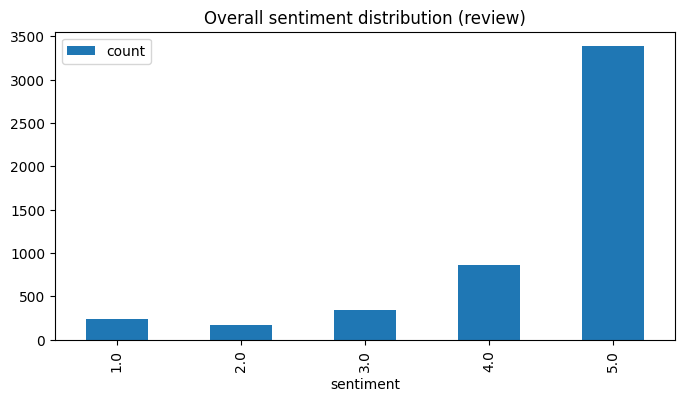

In [13]:
# --------> Distribución de reviews por número de estrellas

# Dibujamos el scoring para ver si tenemos un dataset balanceado. En vista de los resultados tendremos que balancear los datos.
aux_df = pd.DataFrame(reviews_sport['sentiment'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (review)', figsize=(8, 4))

49770


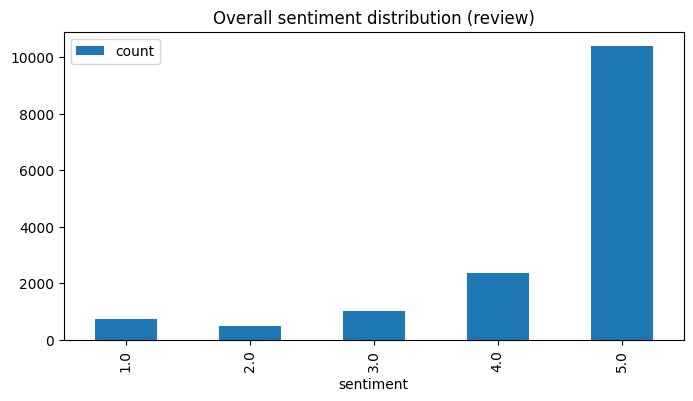

In [14]:
# Como en el ejercicio actual no tenemos un problema de cantidad de datos, podemos cargar más datos para luego coger un subset balanceado
# y así evitar un sesgo cuando lancemos el modelo

data_iterable = dataset['full']

subset = []
for i, record in enumerate(data_iterable):
    subset.append(record)
    if i == 14999:
        break

import pandas as pd
df = pd.DataFrame(subset)
df.to_csv("sports_outdoors_15000.csv", index=False)

###########################################################

reviews_sport = df[['rating', 'title', 'text']]
reviews_sport = reviews_sport.rename(columns={
    'rating': 'sentiment',
    'title': 'title',
    'text': 'review'
})

reviews_sport = reviews_sport.dropna()
reviews_sport.reset_index(drop=True, inplace=True)

############################################################

splitted_reviews = reviews_sport['review'].str.lower().str.split()
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)
vocabulary_ = Counter(words)
print(len(vocabulary_))

############################################################

aux_df = pd.DataFrame(reviews_sport['sentiment'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (review)', figsize=(8, 4))

In [15]:
# Como el ejercicio propuesto es trabajar con unos 5K registros:
filtered_df = reviews_sport[reviews_sport['sentiment'].isin([1, 2, 3])]
count = filtered_df.shape[0]
print("Número de registros con sentiment 1, 2 o 3:", count)

count_4 = reviews_sport[reviews_sport['sentiment'] == 4].shape[0]
count_5 = reviews_sport[reviews_sport['sentiment'] == 5].shape[0]
print(f"Registros con 4 estrellas: {count_4}")
print(f"Registros con 5 estrellas: {count_5}")

# Calculamos la proporción de registros de 4 estrellas vs 5 estrellas
proporcion = count_4 / count_5 if count_5 > 0 else 0
print(f"La proporción de registros de 4 estrellas vs 5 estrellas es: {proporcion:.2f}")

# Total de registros "deseado"
total_registros = 2754
registros_4 = round(int(total_registros * 0.23))
registros_5 = total_registros - registros_4

print(f"Registros de 4 estrellas: {registros_4}")
print(f"Registros de 5 estrellas: {registros_5}")

# Filtramos los registros y concatenamos generando el dataset balanceado
df_4 = reviews_sport[reviews_sport['sentiment'] == 4].sample(n=registros_4, random_state=42)
df_5 = reviews_sport[reviews_sport['sentiment'] == 5].sample(n=registros_5, random_state=42)
df_123 = reviews_sport[reviews_sport['sentiment'].isin([1, 2, 3])]
df_balanceado = pd.concat([df_4, df_5, df_123])
df_balanceado = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Cantidad total de registros balanceados: {df_balanceado.shape[0]}")
print(df_balanceado['sentiment'].value_counts())

Número de registros con sentiment 1, 2 o 3: 2246
Registros con 4 estrellas: 2365
Registros con 5 estrellas: 10389
La proporción de registros de 4 estrellas vs 5 estrellas es: 0.23
Registros de 4 estrellas: 633
Registros de 5 estrellas: 2121
Cantidad total de registros balanceados: 5000
sentiment
5.0    2121
3.0    1007
1.0     738
4.0     633
2.0     501
Name: count, dtype: int64


In [16]:
# Agregamos la columna de clasificación binaria
def label_sentiment(row):
    if int(row['sentiment']) < 4:
        return 1
    else:
        return 0

df_balanceado['sentiment_label'] = df_balanceado.apply(lambda row: label_sentiment(row), axis=1)
df_balanceado.head()

,sentiment,title,review,sentiment_label
0,5.0,"Greatly impressed, I recommend these","Ordered a few bags, put some in mine and my c...",0
1,5.0,Great Lures,Nice quality lures heavy duty,0
2,5.0,Perfect for what I needed,Lost mine in a move. Perfect for what I needed.,0
3,5.0,Great Product,Great quality. Adjustable from 22lbs-88lbs of...,0
4,5.0,Great box,This mini Tackle box comes with so many fishin...,0


In [17]:
# 'Formalizamos' la segmentación anterior asumiendo que que si la relación entre sentiment_label 1 y 0 es <2 el dataset se considera balanceado
class_counts = df_balanceado['sentiment_label'].value_counts()

mayoria = class_counts.max()
minoria = class_counts.min()

cociente_balance = mayoria / minoria if minoria > 0 else float('inf')

print(f"Cociente de balance: {cociente_balance:.2f}")

if cociente_balance <= 2:
    print("El dataset está balanceado.")
else:
    print("El dataset no está balanceado.")

Cociente de balance: 1.23
El dataset está balanceado.


In [18]:
# Calculamos nuevamente la cardinalidad del vocabulario con la que realmente trabajaremos
splitted_reviews = df_balanceado['review'].str.lower().str.split()
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)
vocabulary_ = Counter(words)
len(vocabulary_)

27209

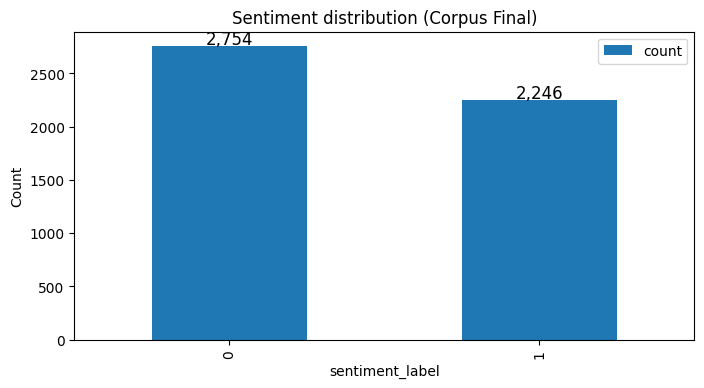

In [19]:
# --------> Nº de reviews positivas y negativas
import matplotlib.pyplot as plt

# Contamos y dibujamos la frecuencia de cada valor en 'sentiment_label'
aux_df = pd.DataFrame(df_balanceado['sentiment_label'].value_counts(sort=False).sort_index())
ax = aux_df.plot(kind='bar', title='Sentiment distribution (Corpus Final)', figsize=(8, 4))

for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.ylabel('Count')
plt.show()

In [20]:
df_balanceado.to_csv("sports_outdoors_dataset.csv", index=False)

In [21]:
# --------> N-grams más frecuentes
from nltk import ngrams
from nltk.probability import FreqDist

# Dibujamos n-gramas principales y observamos la necesidad de eliminar stop words pues los tockens más repetidos son palabras que no aportan significado
bigrams_ = ngrams(words, 2)
trigrams_ = ngrams(words, 3)
bigrams_freq_ = FreqDist(bigrams_)
trigrams_freq_ = FreqDist(trigrams_)
print(bigrams_freq_.most_common(10))
print(trigrams_freq_.most_common(10))

[(('it', 'is'), 1197), (('of', 'the'), 1125), (('in', 'the'), 995), (('is', 'a'), 953), (('on', 'the'), 931), (('this', 'is'), 846), (('i', 'have'), 738), (('and', 'the'), 648), (('easy', 'to'), 587), (('for', 'the'), 585)]
[(('this', 'is', 'a'), 320), (('a', 'lot', 'of'), 195), (('it', 'is', 'a'), 140), (('out', 'of', 'the'), 109), (('i', 'had', 'to'), 99), (('is', 'a', 'great'), 96), (('i', 'have', 'a'), 96), (('if', 'you', 'are'), 89), (('you', 'have', 'to'), 88), (('is', 'easy', 'to'), 88)]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 3.9 MB/s eta 0:00:00
20 palabras más comunes:
br: 2271
like: 1502
one: 1399
use: 1256
would: 1219
get: 990
good: 989
great: 893
well: 882
really: 776
easy: 712
water: 668
little: 632
time: 616
nice: 609
fit: 604
dont: 589
much: 573
Im: 566
size: 563


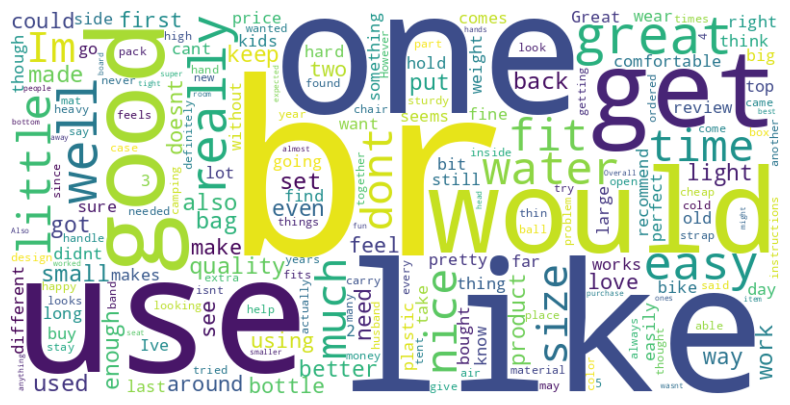

In [22]:
# --------> Nubes de palabras
from collections import Counter
from wordcloud import WordCloud
import string
!pip install unidecode
from unidecode import unidecode

# Dibujamos una nube de palabras para tener una idea de las principales palabras de las reviews seleccionando 'stop words" típicas de la lengua inglesa

stop_words = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves",
    "you", "your", "yours", "yourself", "yourselves", "he", "him",
    "his", "himself", "she", "her", "hers", "herself", "it", "its",
    "itself", "they", "them", "their", "theirs", "themselves",
    "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being",
    "have", "has", "had", "having", "do", "does", "did", "doing",
    "a", "an", "the", "and", "but", "if", "or", "because", "as",
    "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before",
    "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further",
    "then", "once", "here", "there", "when", "where", "why",
    "how", "all", "any", "both", "each", "few", "more", "most",
    "other", "some", "such", "no", "nor", "not", "only", "own",
    "same", "so", "than", "too", "very", "s", "t", "can", "will",
    "just", "don", "should", "now"
])

text = " ".join(
    df_balanceado['review']
    .dropna()
    .astype(str)
    .apply(unidecode)
)

text = text.translate(str.maketrans('', '', string.punctuation))
filtered_words = [word for word in text.split() if word.lower() not in stop_words]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(20)
print("20 palabras más comunes:")
for word, count in most_common_words:
    print(f"{word}: {count}")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32894 sha256=7ef387a54e2c209037db32faca8ecd6efeff7fd4015ecd5fb20370a4539e2cbb
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop_words
20 palabras más comunes:
br: 2271
like: 1502
one: 1399
use: 1256
can: 1217
just: 1208
will: 1027
get: 990
good: 989
great: 893
well: 882
really: 776
easy: 712
water: 668
little: 632
time: 616
nice: 609
fit: 604
dont: 589
much: 573


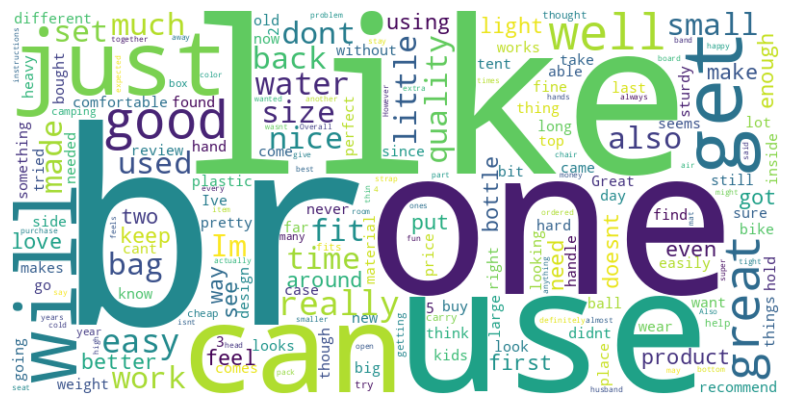

In [23]:
# Esta segunda nube de palabras la haremos con las 'stop words' propias de la librería stop_words
from collections import Counter
from wordcloud import WordCloud
import string
!pip install unidecode
from unidecode import unidecode
!pip install stop_words
from stop_words import get_stop_words

sw = get_stop_words (language = 'en')

text = " ".join(
    df_balanceado['review']
    .dropna()
    .astype(str)
    .apply(unidecode)
)

text = text.translate(str.maketrans('', '', string.punctuation))
filtered_words = [word for word in text.split() if word.lower() not in sw]
word_counts = Counter(filtered_words)
most_common_words = word_counts.most_common(20)
print("20 palabras más comunes:")
for word, count in most_common_words:
    print(f"{word}: {count}")

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Ninguna de las 2 nubres es 'concluyente' y en la etapa de preprocesado usaremos la combinación de librerías y determinadas palabras seleccionadas manualmente.

In [24]:
# --------> Visualización en 2 dimensiones de algunos word embeddings calculados con Word2Vec (elegir 4-5 palabras y pintar las top 10 más similares)
# Aplicamos la arquitectura CBOW (el modelo trata de predecir la palbra dado un contexto) para crear vectores
# donde palabras con significados similares tienen representaciones cercanas en el espacio vectorial
from gensim.models import Word2Vec
import multiprocessing

# Preparamos los parámetros del modelo
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(
                      min_count=20,
                      window=2,
                      vector_size=300,
                      sample=6e-5,
                      alpha=0.03,
                      min_alpha=0.0007,
                      negative=20,
                      workers=cores-1)

# Selección de parámetros:
# - Apariciones mínimas de una palabra en el corpus: 20
# - Ventana de 2 palabras para tener un contexto local
# - Como el dataset es pequeño mantenemos un vector razonablemente pequeño: 300
# - Palabras con frecuencias muy altas serán "submuestreadas"
# - Parámetros 'alpha' definen la tasa de aprendizaje
# - por cada palabra objetivo el modelo selecciona 20 de fuera del contexto
# - Evitamos saturar el PC

In [25]:
from time import time
# Construímos el vocabulario

# Tamaño del vocabulario aplicados los parámetros del modelo
t = time()
sent = [row.split() for row in df_balanceado['review']]
w2v_model.build_vocab(sent, progress_per=10000)

print('Tiempo para construir el vocabulario: {} mins'.format(round((time() - t) / 60, 2)))
print('Vocabulario compuesto por {} palabras'.format(len(w2v_model.wv.key_to_index)))

Tiempo para construir el vocabulario: 0.0 mins
Vocabulario compuesto por 1731 palabras


In [26]:
# Entrenamos el modelo
t = time()
w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.51 mins


In [27]:
w2v_model.save('./w2v_model.pkl')

In [28]:
# Testeamos el modelo buscando palabra similares
w2v_model.wv.most_similar(positive=["excellent"])

[('cotton', 0.9145346283912659),
 ('adequate', 0.8887376189231873),
 ('This', 0.8786541223526001),
 ('build', 0.8715155124664307),
 ('built', 0.8633866906166077),
 ('solid', 0.86015385389328),
 ('variety', 0.8595870137214661),
 ('amazing', 0.8548493385314941),
 ('Great', 0.8455144762992859),
 ('portable', 0.8450819849967957)]

In [29]:
w2v_model.wv.most_similar(positive=["good"])

[('Overall', 0.8537854552268982),
 ('good,', 0.8493489027023315),
 ('tent.', 0.8456370830535889),
 ('Overall,', 0.8448952436447144),
 ('decent', 0.8407577276229858),
 ('Looks', 0.8301073312759399),
 ('overall', 0.8300992846488953),
 ('cute', 0.8273625373840332),
 ('quality.', 0.822844386100769),
 ('yoga', 0.82160884141922)]

In [30]:
w2v_model.wv.most_similar(positive=["bad"])

[('fine,', 0.8985234498977661),
 ('weird', 0.8857311010360718),
 ('appreciate', 0.8726142048835754),
 ('bad.', 0.8668609261512756),
 ('far.', 0.866635262966156),
 ('though.', 0.8653959035873413),
 ('Its', 0.8626124262809753),
 ('Otherwise,', 0.8607056736946106),
 ('fine', 0.8510674834251404),
 ('though,', 0.8509137034416199)]

In [31]:
w2v_model.wv.similarity('bad', 'excellent')

0.52945125

In [32]:
w2v_model.wv.doesnt_match(['bad', 'excellent', 'great'])

'bad'

In [33]:
# De los test anteriores se desprende cierta capacidad del modelo para detectar similitudes.

In [34]:
word_vectors = w2v_model.wv.vectors

In [35]:
# Seleccionamos algunas palabras de los ejercicios anteriores, vemos sus vectores y representamos en 2D
words = ["excellent", "good", "bad", "great","cotton","adequate","This","build","built","solid","variety","amazing","Great","portable"]
word_vectors = [w2v_model.wv[word] for word in words]
for word, vector in zip(words, word_vectors):
    print(f"Palabra: {word} -> Vector: {vector}")

Palabra: excellent -> Vector: [ 8.57836455e-02  9.47665274e-02  1.07781462e-01  5.76503873e-02
  1.04262372e-02 -1.88111171e-01  1.84483290e-01  6.03741966e-02
 -1.46607403e-02  2.92022735e-01  1.88018680e-02  1.02228463e-01
  6.05715811e-03 -6.53620586e-02 -2.90568136e-02 -2.39734039e-01
  1.21586464e-01 -6.34877458e-02 -1.45953238e-01  3.03856023e-02
 -4.21698615e-02  1.24195710e-01  9.22930613e-02  2.13208228e-01
  2.46689379e-01 -5.14323600e-02 -1.04412407e-01  5.03372625e-02
 -5.82753457e-02 -2.03665346e-01  3.69042903e-01  4.27718796e-02
 -2.30571717e-01 -1.83055684e-01 -2.63229525e-03 -2.40893215e-01
  5.15752472e-02  1.75832659e-01  1.40721038e-01  9.52907354e-02
 -8.10148716e-02 -1.78622395e-01  1.97887316e-01 -1.59323394e-01
  1.56412963e-02  2.55958617e-01 -1.94440484e-01  4.94183972e-02
  1.82040576e-02  3.31670165e-01  4.53125359e-03  4.98457849e-02
 -1.18827842e-01  1.69873610e-01 -2.31015142e-02  1.25670955e-01
  2.81501226e-02 -3.47847730e-01 -1.41913220e-02 -1.32898793

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


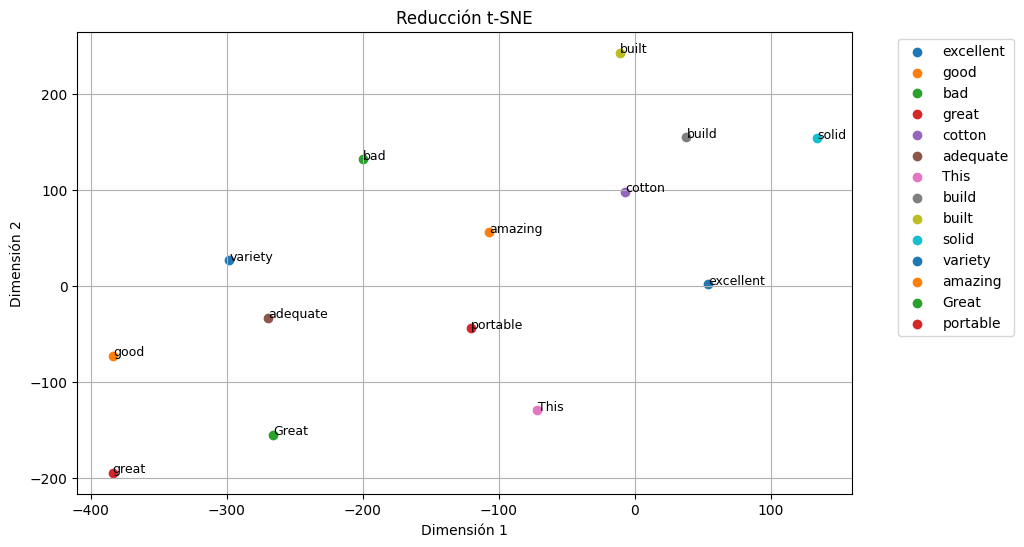

In [36]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Convertimos word_vectors a un array
word_vectors_array = np.array(word_vectors)

# Reducimos las dimensiones a 2D usando t-SNE
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=3,
    n_iter=500,
    learning_rate=300,
    init='pca'
)

reduced_vectors = tsne.fit_transform(word_vectors_array)

plt.figure(figsize=(10, 6))
for word, coord in zip(words, reduced_vectors):
    plt.scatter(coord[0], coord[1], label=word)
    plt.text(coord[0] + 0.1, coord[1], word, fontsize=9)

plt.title("Reducción t-SNE")
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.grid(True)
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.show()

# El dataset no ha sido preprocesado y por lo tanto los resultados no son concluyentes.
# El modelo encuentra similitud entre great y Great o build y built.
# Como indicio es positivo encontrar good cerca de great y alejado de bad.

In [37]:
################################################################################################################################
############################## CONCLUSIONES ####################################################################################
################################################################################################################################

In [38]:
# --------> Conclusiones de la exploración
# En esta primera fase de descarga de datos y exploración se ha pretendido:
# 1. Tener un dataset balanceado (hemos aprovechado disponer de un dataset grande para una selección balanceada)
# 2. Hemos visto el tipo de reviews con las que trabajaremos mediante exploración directa o nube de puntos
# 3. Conocemos los principales n-gramas
# 4. Hemos testeado con la herramienta Word2Vec para entender su potencial (sin optener un resultado óptimo por no tener el modelo preprocesado)